In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Task 1:** Sinh viên cho ví vụ về phép cộng, trừ hai ma trận numpy.

In [16]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

X = A + B

Y = A - B

print("Matrix A:\n", A)
print("Matrix B:\n", B)

print("Sum of A & B:\n", X)
print("Sub of A & B:\n", Y)

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[5 6]
 [7 8]]
Sum of A & B:
 [[ 6  8]
 [10 12]]
Sub of A & B:
 [[-4 -4]
 [-4 -4]]


# **Task 2**:
Sinh viên sử dụng pandas xử lý các yêu cầu sau:
- Đọc CSV thành Dataframe và hiển thị
- Hãy chuyển index mặc định thành giá trị cột id
- Sắp xếp dữ liễu theo nhiều cột (sort)
- Chọn một cột cụ thể và hiển thị nó
- Chọn 2 hàng đầu tiền và hiển thị chúng
- Hãy chọ một hàng dựa trên một điều kiện giá trị của cột
- Thay đổi một vài giá trị thành NaN ở CSV, sau đó đọc lên thành Dataframe và thay thế chúng bằng giá trị 0
- Ở cột Z chuyển giá trị lớn hơn 90 là True và nhỏ hơn là False trong Dataframe
- Chuyển Dataframe trên thành 2 Dataframe d1 và d2; d1 chứ cột X và Y, d2
chứa cột Z; cuối cùng d3 là thành quả của nối 2 Dataframe d1 và d2
- Dùng tính năng thống kê hãy hiển thị kết quả thông kể các giá trị thuộc tính
của Dataframe

**Đọc	CSV	thành	Dataframe và	hiển thị,	chuyển	index	mặc	định	thành	giá	trị	cột	id**

In [17]:
import pandas as pd
df = pd.read_csv(r"/content/drive/MyDrive/ColabNotebooks/Lab_1/data.csv")
df.head()
df_setid = df.set_index('id')
df_setid.head()

,X,Y,Z
id,,,
1,78,84,86
2,85,94,97
3,80,83,73
4,96,94,96
5,86,86,83


**Sắp	xếp	dữ	liệu	theo	nhiều	cột	(sort)**

In [18]:
df.sort_values(by=['X','Y','Z'])

,id,X,Y,Z
0,1,78,84,86
2,3,80,83,73
1,2,85,94,97
4,5,86,86,83
3,4,96,94,96


**Chọn một cột cụ thể và hiển thị**

In [19]:
df.X

,X
0,78
1,85
2,80
3,96
4,86


**Chọn 2 hàng đầu tiên và hiển thị chúng**

In [20]:
df.iloc[0:2]


,id,X,Y,Z
0,1,78,84,86
1,2,85,94,97


Chọn	một	hàng	dựa	trên	một	điều	kiện	giá	trị	của	cột


In [21]:
df[df.X==85]


,id,X,Y,Z
1,2,85,94,97


**Thay	đổi	một	vài	giá	trị	thành	NaN ở	CSV, sau	đó	đọc	lên	thành	Dataframe	và thay	thế	chúng	bằng	giá	trị	0**

In [22]:
df_Nan = df
# Replace some places with N/A values
df_Nan.loc[2, 'Y'] = np.nan
df_Nan.loc[4, 'X'] = np.nan
print(df_Nan)
df_Nan.fillna(0) # Fill all N/A values with zero

   id     X     Y   Z
0   1  78.0  84.0  86
1   2  85.0  94.0  97
2   3  80.0   NaN  73
3   4  96.0  94.0  96
4   5   NaN  86.0  83


,id,X,Y,Z
0,1,78.0,84.0,86
1,2,85.0,94.0,97
2,3,80.0,0.0,73
3,4,96.0,94.0,96
4,5,0.0,86.0,83


**Ở	cột	Z	chuyển	giá	trị	lớn	hơn	90	là	True	và	nhỏ	hơn	là	False	trong	Dataframe**


In [23]:
df.Z = (df.Z > 90)
print(df)

   id     X     Y      Z
0   1  78.0  84.0  False
1   2  85.0  94.0   True
2   3  80.0   NaN  False
3   4  96.0  94.0   True
4   5   NaN  86.0  False


**Chuyển	Dataframe	trên	thành	2	Dataframe	d1	và	d2;	d1	chứ	cột	X	và	Y,	d2 chứa	cột	Z;	cuối	cùng	d3	là	thành	quả	của	nối	2	Dataframe	d1	và	d2**

In [24]:
d1 = pd.DataFrame(df, columns = ['X', 'Y'])
d2 = pd.DataFrame(df, columns = ['Z'])
d3 = pd.merge(d1, d2, left_index=True, right_index=True)
print(d3)

      X     Y      Z
0  78.0  84.0  False
1  85.0  94.0   True
2  80.0   NaN  False
3  96.0  94.0   True
4   NaN  86.0  False


**Dùng	tính	năng	thống	kê	hãy	hiển	thị	kết	quả	thống	kê	các	giá	trị	thuộc tính của	Dataframe**

In [25]:
d3.describe()

,X,Y
count,4.000000,4.000000
mean,84.750000,89.500000
std,8.057088,5.259911
min,78.000000,84.000000
25%,79.500000,85.500000
50%,82.500000,90.000000
75%,87.750000,94.000000
max,96.000000,94.000000


# **Task 3:** Sinh viên tự tìm hiểu thực hiện lại ví dụ dùng mô hình Linear Regression trong thư viện scikit-learning bằng các thư viện sau: TensorFlow, Keras, PyTorch. Cho biết cảm nghĩ về việc dùng 4 thư viện này

# 1. Scikit-learn


*   Thêm dữ liệu đầu vào X dạng ma trận cột, Y sẽ là đầu ra tương ứng với từng giá trị X
*   Khởi tạo mô hình hồi quy tuyến tính trên dữ liệu (X,Y) tức tìm a và b trong phương trình hồi quy tính tính dạng Y=aX+b, dùng fit(X,y) để thực hiện huấn luận mô hình
*   Dựa trên giá trị của a và b sẽ thực hiện dự đoán giá trị y cho x = 13






In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
# X is a matrix that represents the training dataset
# y is a vector of weights, to be associated with input dataset
X = np.array([[3], [5], [7], [9], [11]]).reshape(-1, 1)
y = [8.0, 9.1, 10.3, 11.4, 12.6]
lreg_model = LinearRegression()
lreg_model.fit(X, y)
# New data (unseen before)
new_data = np.array([[13]])
print('Model Prediction for new data: $%.2f' %
lreg_model.predict(new_data)[0] )

Model Prediction for new data: $13.73


# 2. TensorFlow
*   Với dữ liệu đã được chuẩn bị trước sẽ  được TensorFlow dùng  mô hình đơn giản với các lớp xếp chồng lên nhau  xử lí ( mô hình gồm 1 nơ ron đầu ra và 1 đặc trưng đầu vào )


*   Sử dụng thuật toán Gradient Descent ( Lặp qua tất cả điểm dữ liệu, thuật toán sẽ tính gradient của  để  toàn bộ dữ liệu huấn luyện trước khi cập nhật trọng số ) tối ưu mô hình và Mean Squard Error làm hàm lỗi

*   Huấn luyện mô  hình được chạy  500  lần để tối ưu trọng số, có option ẩn thông tin quá trình huấn luyện đi bằng verbose = 0
*   Trả về kết quả dự đoán giá trị cho x = 13 dạng mảng numpy





In [27]:
import tensorflow as tf
import numpy as np

# Dữ liệu được chuẩn bị
X = np.array([[3], [5], [7], [9], [11]], dtype=np.float32)
y = np.array([[8.0], [9.1], [10.3], [11.4], [12.6]], dtype=np.float32)

# Xây dựng mô hình Linear Regression với TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # 1 neuron, input có 1 feature
])

# Compile mô hình
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

# Huấn luyện mô hình
model.fit(X, y, epochs=500, verbose=0)

# Dự đoán và trả về kết quả
new_data = np.array([[13]], dtype=np.float32)
prediction = model.predict(new_data)
print(f'TensorFlow Prediction: ${prediction[0][0]:.2f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
TensorFlow Prediction: $14.65


# 3. **Keras**


*   Thực chất là 1 API cấp cao của TensorFlow, nhưng có thể dùng riêng biệt trong 1 số trường hợp
*   Gần tương tự như TensorFlow, với dữ liệu có sẵn  thì Keras sẽ tạo 1 model đơn giản với 1 nơ ron đầu ra và 1 đặc trưng đầu vào cho kiểu dữ liệu như này


*   Sử dụng thuật toán Stochastic Gradient Descent ( nhanh  hơn so với Gradient Descent, chỉ tính gradient trên 1 điểm dữ liệu duy nhất tại mỗi bước cập nhật ) và Mean Squard Error làm hàm lỗi
*   Huấn luyện mô hình được chạy 500 lần để tối ưu trọng số, có option ẩn thông tin quá trình huấn luyện đi


*   Trả về giá trị dự đoán cho x = 13 dưới dạng mảng numpy
*   List item






In [28]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Dữ liệu
X = np.array([[3], [5], [7], [9], [11]], dtype=np.float32)
y = np.array([[8.0], [9.1], [10.3], [11.4], [12.6]], dtype=np.float32)

# Xây dựng mô hình Linear Regression với Keras
model = Sequential()
model.add(Dense(units=1, input_dim=1))

# Compile mô hình
model.compile(optimizer='sgd', loss='mse')

# Huấn luyện mô hình
model.fit(X, y, epochs=500, verbose=0)

# Dự đoán
new_data = np.array([[13]], dtype=np.float32)
prediction = model.predict(new_data)
print(f'Keras Prediction: ${prediction[0][0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Keras Prediction: $14.65


# 4. PyTorch


*   Dữ liệu đầu vào ở mô hình PyTorch sẽ chuẩn thành tensor ( tương tự numpy nhưng dành cho PyTorch )
*   Xây dựng mô hình với 1 input và 1  output, hàm forward sẽ xác định cách tính toán đó là tính đầu ra từ đầu vào


*   Thuật toán của mô hình sẽ gồm 3 bước chính, mô hình được huấn luyện 500 lần
  *   zero_grad(): Xóa grad cũ trước khi tính toán mới.
  *   backward(): Tính toán gradient
  *   step(): Cập nhật trọng số
*   Thực hiện dữ đoán kết quả cho x = 13







In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dữ liệu
X_train = torch.tensor([[3], [5], [7], [9], [11]], dtype=torch.float32)
y_train = torch.tensor([[8.0], [9.1], [10.3], [11.4], [12.6]], dtype=torch.float32)

# Xây dựng mô hình Linear Regression với PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input, 1 output

    def forward(self, x):
        return self.linear(x)

# Khởi tạo mô hình
model = LinearRegressionModel()

# Hàm loss và optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Huấn luyện mô hình
for epoch in range(500):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

# Dự đoán
new_data = torch.tensor([[13]], dtype=torch.float32)
prediction = model(new_data).item()
print(f'PyTorch Prediction: ${prediction:.2f}')


PyTorch Prediction: $14.72


# 5. Cảm nghĩ
*   Scikit-learn: Phù hợp nhất cho các bài toán machine learning đơn giản, vì nó cung cấp một API dễ dùng mà không cần quá nhiều tinh chỉnh
*   TensorFlow: Mạnh mẽ nhưng hơi "cồng kềnh" cho bài toán Linear Regression đơn giản. Hữu ích khi cần mở rộng sang mô hình deep learning
*   Keras: Giao diện thân thiện hơn TensorFlow, thích hợp cho những ai muốn làm deep learning nhưng không muốn quá nhiều cấu hình phức tạp
*   PyTorch: Linh hoạt và dễ debug hơn TensorFlow, thích hợp cho nghiên cứu và phát triển các mô hình deep learning



# **Task 4:** Sinh viên hoàn thành code phát hiện spam với SVMs và Linear regression

In [30]:
!pip install matplotlib

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Đọc file CSV
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Lab_1/sms_spam_svm.csv', encoding='utf-8')

# 2. Ánh xạ nhãn: ham -> 0, spam -> 1
df['label_num'] = df['type'].map({'ham': 0, 'spam': 1})

# 3. Sử dụng cột "suspect" và "neutral" làm đặc trưng đầu vào
X = df[['suspect', 'neutral']].values
y = df['label_num'].values

# 4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Huấn luyện mô hình SVM với kernel linear
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 6. Huấn luyện mô hình Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Chuyển giá trị dự đoán liên tục thành nhãn nhị phân với ngưỡng 0.5
y_pred_lin_binary = (y_pred_lin >= 0.5).astype(int)
lin_accuracy = accuracy_score(y_test, y_pred_lin_binary)
print("\nLinear Regression Accuracy:", lin_accuracy)
print("Linear Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lin_binary))


SVM Accuracy: 0.8333333333333334
SVM Confusion Matrix:
[[25  0]
 [ 5  0]]

Linear Regression Accuracy: 0.8333333333333334
Linear Regression Confusion Matrix:
[[25  0]
 [ 5  0]]


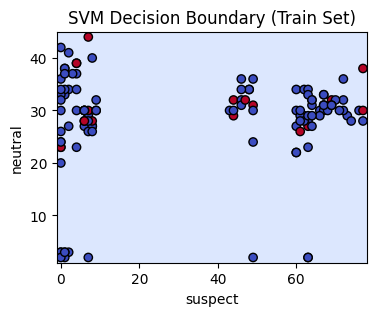

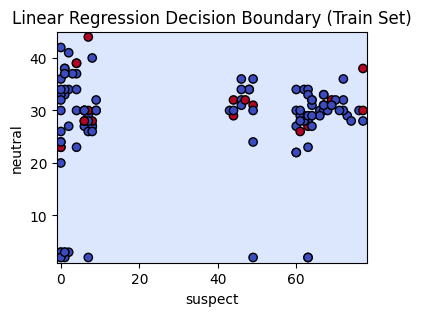

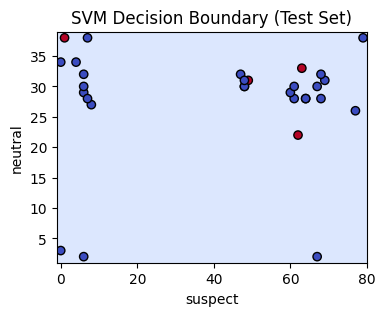

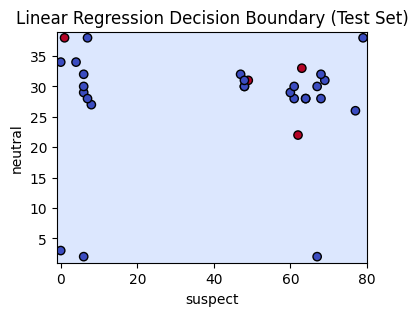

In [32]:
import matplotlib.pyplot as plt
# Hàm vẽ ranh giới quyết định cho mô hình có phương thức predict
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Dự đoán nhãn trên lưới điểm
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(4,3))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('suspect')
    plt.ylabel('neutral')
    plt.title(title)
    plt.show()

# Hàm vẽ ranh giới cho mô hình Linear Regression với threshold 0.5
def plot_decision_boundary_linreg(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Dự đoán và áp dụng ngưỡng 0.5
    Z = model.predict(grid)
    Z = (Z >= 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(4,3))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('suspect')
    plt.ylabel('neutral')
    plt.title(title)
    plt.show()

# Vẽ ranh giới quyết định trên tập huấn luyện
plot_decision_boundary(svm, X_train, y_train, "SVM Decision Boundary (Train Set)")
plot_decision_boundary_linreg(lin_reg, X_train, y_train, "Linear Regression Decision Boundary (Train Set)")

# Vẽ ranh giới quyết định trên tập kiểm tra
plot_decision_boundary(svm, X_test, y_test, "SVM Decision Boundary (Test Set)")
plot_decision_boundary_linreg(lin_reg, X_test, y_test, "Linear Regression Decision Boundary (Test Set)")


# **Task 5:** Sinh viên cho biết chức năng của phương thức genfromtxt() trong thư viện numpy.

In [33]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

phishing_dataset = np.genfromtxt(r"/content/drive/MyDrive/ColabNotebooks/Lab_1/phishing_dataset.csv", delimiter=',', dtype=np.int32)
samples = phishing_dataset[:,:-1]
targets = phishing_dataset[:, -1]

from sklearn.model_selection import train_test_split
training_samples, testing_samples, training_targets, testing_targets = train_test_split( samples, targets, test_size=0.2, random_state=0)

log_classifier = LogisticRegression()
log_classifier.fit(training_samples, training_targets)

predictions = log_classifier.predict(testing_samples)
accuracy = 100.0 * accuracy_score(testing_targets, predictions)
print("Logistic Regression accuracy: " + str(accuracy))

print("Phương thức genfromtxt() trong thư viện numpy dùng để đọc dữ liệu từ file csv. Đối số delimiter=',' dùng để phân tách các giá trị trong file csv bằng dấu phẩy. Đối số dtype=np.int32 dùng để xác định kiểu dữ liệu của dữ liệu đọc vào là số nguyên 32 bit")
print("=> Chuyển dữ liệu từ file csv sang dạng ma trận số nguyên 32 bit")
print("=> Dữ liệu được chia thành 2 phần: samples và targets")
print("=> samples lấy tất cả các hàng và tất cả các cột trừ cột cuối cùng")
print("=> targets lấy tất cả các hàng và chỉ cột cuối cùng")


Logistic Regression accuracy: 91.72320217096338
Phương thức genfromtxt() trong thư viện numpy dùng để đọc dữ liệu từ file csv. Đối số delimiter=',' dùng để phân tách các giá trị trong file csv bằng dấu phẩy. Đối số dtype=np.int32 dùng để xác định kiểu dữ liệu của dữ liệu đọc vào là số nguyên 32 bit
=> Chuyển dữ liệu từ file csv sang dạng ma trận số nguyên 32 bit
=> Dữ liệu được chia thành 2 phần: samples và targets
=> samples lấy tất cả các hàng và tất cả các cột trừ cột cuối cùng
=> targets lấy tất cả các hàng và chỉ cột cuối cùng


### Nhận xét:
***SVM (Support Vector Machine):***
- Ưu điểm:
    + Rất hiệu quả cho bài toán phân loại, đặc biệt khi có dữ liệu dạng vector từ Tfidf.
    + Khả năng phân chia ranh giới giữa các lớp rõ ràng (đặc biệt với kernel linear khi dữ liệu có thể tách tuyến tính).
- Nhược điểm:
    + Đòi hỏi điều chỉnh các tham số như C (độ phạt) để đạt hiệu suất tối ưu.
    + Có thể tốn thời gian nếu tập dữ liệu lớn.

***Linear Regression:***
- Ưu điểm:
    + Mã nguồn đơn giản và dễ triển khai.
    + Nhanh chóng cho các tập dữ liệu nhỏ hoặc các bài toán đơn giản.
- Nhược điểm:
    + Không được thiết kế cho bài toán phân loại (vì nó dự đoán giá trị liên tục), nên cần phải chuyển đổi ngưỡng (thresholding) để có nhãn.
    + Hiệu suất thường kém hơn các thuật toán phân loại chuyên dụng như SVM, đặc biệt khi dữ liệu không có sự phân chia tuyến tính rõ ràng.

=> Nhìn chung, đối với bài toán phát hiện spam, SVM thường cho kết quả tốt hơn và ổn định hơn so với Linear Regression vì nó chuyên dụng cho các bài toán phân loại. Tuy nhiên, việc thực hiện cả hai giúp ta có cái nhìn tổng quan về cách các mô hình khác nhau hoạt động và có thể so sánh trực tiếp hiệu quả của chúng trên cùng một tập dữ liệu.

# **Task 6:** Sinh viên hoàn thiện code Decision trees trên và đánh giá kết quả nhận được so với phương pháp Logistic regression.

- Bước 1: Tiền xử lí datasets như mô hình Logistic Regression
- Bước 2: Tạo và huấn luyện mô hình Decision Tree dựa trên tập dataset training_samples và training_targets
- Bước 3: Sau khi thực hiện huấn luyện thì ta test thử trên tập dataset testing

In [34]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Bước 1:
phishing_dataset = np.genfromtxt(r"/content/drive/MyDrive/ColabNotebooks/Lab_1/phishing_dataset.csv", delimiter=',', dtype=np.int32)
samples = phishing_dataset[:,:-1]
targets = phishing_dataset[:, -1]
print('Phishing dataset')
print(phishing_dataset, '\n')

training_samples, testing_samples, training_targets, testing_targets = train_test_split(samples, targets, test_size=0.2, random_state=0)

# Bước 2:
# Tạo và huấn luyện mô hình Decision Tree
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(training_samples, training_targets)

# Bước 3:
# Dự đoán trên tập kiểm tra
tree_predictions = tree_classifier.predict(testing_samples)

# Đánh giá kết quả sử dụng độ chính xác
tree_accuracy = 100.0 * accuracy_score(testing_targets, tree_predictions)
print("Decision Tree accuracy:", tree_accuracy)

Phishing dataset
[[-1  1  1 ...  1 -1 -1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  0  1 ...  0 -1 -1]
 ...
 [ 1 -1  1 ...  0  1 -1]
 [-1 -1  1 ...  1  1 -1]
 [-1 -1  1 ...  1 -1 -1]] 

Decision Tree accuracy: 96.33649932157394


**- Nhận xét:** có thể thấy rằng kết quả thu được của mô hình Decision Tree là 96.29 tốt hơn so với kết quả của mô hình Logistic Regression là 91.72

**- Lí do:** mô hình Decision Tree có khả năng học được các mối quan hệ phức tạp và không tuyến tính giữa các đặc trưng và nhãn. Trong khi đó, mô hình Logistic Regression tạo ra các mối quan hệ giữa các đặc trưng và nhãn là tuyến tính. Với tập dataset được cho, kết quả trả về chỉ có hai nhãn là -1 và 1 (có thể tương ứng với “đúng" và "sai"), không có tính tuyến tính, vì vậy, mô hình Decision Tree phù hợp hơn.

# **Task 7:** Sinh viên thực hiện code phát hiện phising website bằng mô hình học máy Logistic regression và Decision trees với train và test trên tập dữ liệu https://www.kaggle.com/shashwatwork/phishing-dataset-for-machine-learning

Sinh	viên	thực	hiện	code	phát	hiện	phising	website	bằng	mô	hình	học	máy	Logistic	regression và	Decision	trees	với	train	và	test	trên	tập	dữ	liệu

**Logistic regression**

In [35]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"/content/drive/MyDrive/ColabNotebooks/Lab_1/Phishing_Legitimate_full.csv")

#Convert data
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')

int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')

data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

# Phân loại thông tin để tìm mối tương qua giữa tuyến tính và phi tuyến tính của các labels và feature
from sklearn.feature_selection import mutual_info_classif
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Dùng LogisticRegression
# Chia data thành các tập và kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

# Tiêu chuẩn hóa data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xác dịnh mô hình của Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y_true, y_pred):
    return (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean()

def gradient(X, y, weights):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    return gradient

def train(X_train, y_train, X_test, y_test, learning_rate, epochs):
    # Khởi tạo weights
    weights = np.zeros(X_train.shape[1])

    # Mô hình huấn luyện sẽ như sau
    for i in range(epochs):
        # Tính grad
        grad = gradient(X_train, y_train, weights)

        # Cập nhật weights
        weights -= learning_rate * grad

        # Đánh giá mô hình trên tập huấn luyện và kiểm tra
        train_loss = loss(y_train, sigmoid(np.dot(X_train, weights)))
        test_loss = loss(y_test, sigmoid(np.dot(X_test, weights)))
        print(f"Epoch {i + 1}/{epochs}, train loss: {train_loss:.4f}, test loss: {test_loss:.4f}")

    return weights

# Train mô hình logistic regression
learning_rate = 0.5
epochs = 50
weights = train(X_train, y_train, X_test, y_test, learning_rate, epochs)

# Dự đoán trên tập kiểm tra
y_pred = sigmoid(np.dot(X_test, weights))
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Đánh giá sự chính xác của mô hình
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_binary)
print("accuracy:", accuracy)

Epoch 1/50, train loss: 0.5195, test loss: 0.5213
Epoch 2/50, train loss: 0.4395, test loss: 0.4413
Epoch 3/50, train loss: 0.3927, test loss: 0.3941
Epoch 4/50, train loss: 0.3613, test loss: 0.3625
Epoch 5/50, train loss: 0.3386, test loss: 0.3395
Epoch 6/50, train loss: 0.3213, test loss: 0.3219
Epoch 7/50, train loss: 0.3075, test loss: 0.3079
Epoch 8/50, train loss: 0.2963, test loss: 0.2965
Epoch 9/50, train loss: 0.2869, test loss: 0.2869
Epoch 10/50, train loss: 0.2789, test loss: 0.2788
Epoch 11/50, train loss: 0.2720, test loss: 0.2718
Epoch 12/50, train loss: 0.2659, test loss: 0.2656
Epoch 13/50, train loss: 0.2606, test loss: 0.2602
Epoch 14/50, train loss: 0.2559, test loss: 0.2554
Epoch 15/50, train loss: 0.2516, test loss: 0.2511
Epoch 16/50, train loss: 0.2478, test loss: 0.2472
Epoch 17/50, train loss: 0.2443, test loss: 0.2437
Epoch 18/50, train loss: 0.2411, test loss: 0.2404
Epoch 19/50, train loss: 0.2382, test loss: 0.2375
Epoch 20/50, train loss: 0.2355, test lo

**Decision Tree**

In [36]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"/content/drive/MyDrive/ColabNotebooks/Lab_1/Phishing_Legitimate_full.csv")

# Convert data
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')

int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')

data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

#  Phân loại thông tin để tìm mối tương qua giữa tuyến tính và phi tuyến tính của các labels và feature
from sklearn.feature_selection import mutual_info_classif

X = data.drop(['id', 'labels'], axis=1)
y = data['labels']
discrete_features = X.dtypes == int
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx # index của feature
        self.threshold = threshold     # Ngưỡng của việc phân chua
        self.left = left               # cây con bên phải
        self.right = right             # cây con bên trái
        self.value = value             # giá trị của node lá

class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self.build_tree(X, y, self.max_depth) # xây dựng decision tree

    def predict(self, X):
      # duyệt qua cây
        return np.array([self.traverse(x, self.root) for x in X])

    def traverse(self, x, node):
      # kiểm tra nếu node hiện tại là node lá
        if node.value is not None:
      # nếu đúng thì return về class dự đoán của label
            return node.value
      # hệ số của feature
        elif x[node.feature_idx] < node.threshold:
      # đi theo nhánh bên trái của cây
            return self.traverse(x, node.left)
        else:
      # đi theo nhánh bên phải của cây
            return self.traverse(x, node.right)

    def build_tree(self, X, y, max_depth, min_samples_leaf=1):
      # dừng nếu đạt đến độ sâu tối đa hoặc tất cả các labels đều giống nhau
        if max_depth == 0 or len(np.unique(y)) == 1 or len(X) < min_samples_leaf:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)
      # tìm feature và ngưỡng tốt nhất để split
        feature_idx, threshold = self.find_best_split(X, y)
      # dừng lại nếu không có sự phân chia nào cải thiện được thông tin
        if feature_idx is None or threshold is None:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)
      # chia data dựa trên feature và ngưỡng tìm được
        left_indices = X[:, feature_idx] < threshold
        right_indices = X[:, feature_idx] >= threshold
        left_X, left_y = X[left_indices], y[left_indices]
        right_X, right_y = X[right_indices], y[right_indices]
      # Xây dựng tính đệ quy cho cây con trái và phải
        left_subtree = self.build_tree(left_X, left_y, max_depth-1, min_samples_leaf)
        right_subtree = self.build_tree(right_X, right_y, max_depth-1, min_samples_leaf)
      # trả về nút gốc của cây con
        return Node(feature_idx=feature_idx, threshold=threshold, left=left_subtree, right=right_subtree)

    def find_best_split(self, X, y):
      # tìm số lượng feature trong ma trận của feature
        n_features = X.shape[1]
        best_feature_idx, best_threshold, best_info_gain = None, None, -1
        parent_entropy = self.entropy(y)
      # Lặp lại từng feature và từng ngưỡng để tìm ra sự phân chia tốt nhất
        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            thresholds = np.unique(feature_values)
            for threshold in thresholds:
                left_indices = feature_values < threshold
                right_indices = feature_values >= threshold
                left_y, right_y = y[left_indices], y[right_indices]

                child_entropy = (len(left_y) * self.entropy(left_y) + len(right_y) * self.entropy(right_y)) / len(y)
                info_gain = parent_entropy - child_entropy
      # Cập nhật feature, ngưỡng và sự tăng lên của thông tin nếu sự phân chia hiện tại tốt hơn
                if info_gain > best_info_gain:
                    best_feature_idx, best_threshold, best_info_gain = feature_idx, threshold, info_gain

        return best_feature_idx, best_threshold
    # Tính entropy của 1 bộ nhãn
    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=50)

# Train decision tree
dt = DecisionTree(max_depth=10)
dt.fit(X_train, y_train)

# Tạo prediction
y_pred = dt.predict(X_test)

# Tính accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("accuracy:", accuracy)

accuracy: 0.9644


# **Task 8:**  Sinh viên thực hiện code phát hiện phising website bằng mô hình học máy Logistic regression hoặc Decision trees với train và test trên tập dữ liệu phishtank. Tham khảo cách xử lý và trích xuất thuộc tích https://github.com/surajr/URL-Classification

## **Huấn Luyện Mô Hình**

In [37]:
!pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.2 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import tldextract
# Trích xuất dữ liệu
URLphising = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Lab_1/online-valid.csv') # Đọc dữ liệu từ file CSV
URLphising.sample().reset_index(drop=True) # Hiển thị một mẫu dữ liệu
URLphising.head() # Hiển thị 5 dòng đầu tiên

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,6557033,http://u1047531.cp.regruhosting.ru/acces-inges...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T22:01:43+00:00,yes,2020-05-09T22:03:07+00:00,yes,Other
1,6557032,http://hoysalacreations.com/wp-content/plugins...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T22:01:37+00:00,yes,2020-05-09T22:03:07+00:00,yes,Other
2,6557011,http://www.accsystemprblemhelp.site/checkpoint...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:54:31+00:00,yes,2020-05-09T21:55:38+00:00,yes,Facebook
3,6557010,http://www.accsystemprblemhelp.site/login_atte...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:53:48+00:00,yes,2020-05-09T21:54:34+00:00,yes,Facebook
4,6557009,https://firebasestorage.googleapis.com/v0/b/so...,http://www.phishtank.com/phish_detail.php?phis...,2020-05-09T21:49:27+00:00,yes,2020-05-09T21:51:24+00:00,yes,Microsoft


In [39]:
URLphising['target'].value_counts() # Đếm số lượng mỗi nhãn

,count
target,
Other,12881
PayPal,535
Microsoft,216
Facebook,169
Steam,148
...,...
WalMart,1
Branch Banking and Trust Company,1
Live,1


In [40]:
URLphising_extract = URLphising[['url']] # Chọn cột 'url' làm dữ liệu đầu vào
URLphising_extract['isPhising'] = 1 # Tạo cột 'isPhising' với giá trị 1 (phishing)
URLphising_extract.head() # Hiển thị 5 dòng đầu tiên


<ipython-input-40-61d619e0c753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  URLphising_extract['isPhising'] = 1 # Tạo cột 'isPhising' với giá trị 1 (phishing)


,url,isPhising
0,http://u1047531.cp.regruhosting.ru/acces-inges...,1
1,http://hoysalacreations.com/wp-content/plugins...,1
2,http://www.accsystemprblemhelp.site/checkpoint...,1
3,http://www.accsystemprblemhelp.site/login_atte...,1
4,https://firebasestorage.googleapis.com/v0/b/so...,1


In [41]:
URLbenign = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Lab_1/Benign_list_big_final.csv') # Đọc dữ liệu từ file CSV
URLbenign.columns = ['url'] # Đặt tên cột
URLbenign['isPhising'] = 0 # Tạo cột 'isPhising' với giá trị 0 (không phải phishing)
URLbenign.head() # Hiển thị 5 dòng đầu tiên

,url,isPhising
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,0
4,http://1337x.to/torrent/1160078/Avengers-age-o...,0


In [42]:
URLdataset_phising = URLphising_extract.sample(n = 1000) # Lấy ngẫu nhiên 1000 mẫu từ dữ liệu phising
URLdataset_benign = URLbenign.sample(n = 1000) # Lấy ngẫu nhiên 1000 mẫu từ dữ liệu benign
URLdataset = pd.concat([URLdataset_phising, URLdataset_benign]) # Kết hợp hai tập dữ liệu

In [43]:
Suspicious_TLD=['zip','cricket','link','work','party','gq','kim','country','science','tk'] # Danh sách các TLD đáng ngờ
Suspicious_Domain=['luckytime.co.kr','mattfoll.eu.interia.pl',
                   'trafficholder.com','dl.baixaki.com.br',
                   'bembed.redtube.comr','tags.expo9.exponential.com','deepspacer.com',
                   'funad.co.kr','trafficconverter.biz'] # Danh sách các domain đáng ngờ

def countdots(url):
    return url.count('.') # Đếm số dấu chấm

def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1

    return count # Đếm số ký tự đặc biệt


import ipaddress as ip

def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0 # Kiểm tra xem đầu vào có phải là địa chỉ IP hay không


def isPresentHyphen(url):
    return url.count('-') # Đếm số dấu gạch ngang


def isPresentAt(url):
    return url.count('@') # Đếm số dấu @


def isPresentDSlash(url):
    return url.count('//')  # Đếm số dấu gạch chéo đôi


def countSubDir(url):
    return url.count('/') # Đếm số thư mục con


def get_ext(url):
    """Return the filename extension from url, or ''."""

    root, ext = splitext(url)
    return ext # Trả về phần mở rộng của tên file


def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.')) # Đếm số tên miền phụ


def countQueries(query):
    if not query:
        return 0
    else:
        return len(query.split('&')) # Đếm số truy vấn


In [44]:
featureSet = pd.DataFrame(columns=('url','no of dots','presence of hyphen',
                                   'len of url','presence of at','presence of double slash',
                                   'no of subdir','no of subdomain','len of domain','no of queries',
                                   'is IP','presence of Suspicious_TLD',
                                   'presence of suspicious domain','label'), dtype=np.int32) # Tạo DataFrame để lưu trữ các đặc trưng

featureSet.head() # Hiển thị 5 dòng đầu tiên

,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,presence of Suspicious_TLD,presence of suspicious domain,label


In [45]:
def getFeatures(url, label):
    result = [] # Khởi tạo một list rỗng để lưu trữ các đặc trưng
    url = str(url) # Chuyển đổi url sang chuỗi

    result.append(url) # Thêm url vào list kết quả
    path = urlparse(url) # Tách url thành các phần nhỏ
    ext = tldextract.extract(url) # Trích xuất tên miền từ url
    result.append(countdots(ext.subdomain)) # Đếm số dấu chấm trong tên miền phụ
    result.append(isPresentHyphen(path.netloc)) # Kiểm tra xem dấu gạch ngang có xuất hiện trong url hay không
    result.append(len(url)) # Độ dài của url
    result.append(isPresentAt(path.netloc)) # Kiểm tra xem dấu @ có xuất hiện trong url hay không
    result.append(isPresentDSlash(path.path))   # Kiểm tra xem dấu gạch chéo đôi có xuất hiện trong url hay không
    result.append(countSubDir(path.path)) # Đếm số thư mục con
    result.append(countSubDomain(ext.subdomain)) # Đếm số tên miền phụ
    result.append(len(path.netloc)) # Độ dài của tên miền
    result.append(len(path.query)) # Đếm số truy vấn
    result.append(isip(ext.domain)) # Kiểm tra xem url có phải là địa chỉ IP hay không
    result.append(1 if ext.suffix in Suspicious_TLD else 0) # Kiểm tra xem phần mở rộng của tên miền có nằm trong danh sách TLD đáng ngờ hay không
    result.append(1 if '.'.join(ext.domain) in Suspicious_Domain else 0 ) # Kiểm tra xem tên miền có nằm trong danh sách domain đáng ngờ hay không
    result.append(label)
    return result # Trả về một list chứa các đặc trưng của URL

In [46]:
URLdataset["isPhising"][0:1].values[0] # Lấy nhãn của URL đầu tiên

URLdataset["url"][0:1] # Lấy URL đầu tiên

features = getFeatures(URLdataset["url"][0:1], URLdataset["isPhising"][0:1].values) # Lấy các đặc trưng của URL đầu tiên
len(features) # Số lượng đặc trưng

for i in range(len(URLdataset)):
    features = getFeatures(URLdataset["url"][i:i+1], URLdataset["isPhising"][i:i+1].values[0]) # Lấy các đặc trưng của URL thứ i
    featureSet.loc[i] = features # Thêm các đặc trưng vào DataFrame
featureSet # Hiển thị DataFrame chứa các đặc trưng

,url,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,no of queries,is IP,presence of Suspicious_TLD,presence of suspicious domain,label
0,11102 http://www.midyatmimaritas.com/gizlil...,0,0,83,0,1,3,0,0,0,0,0,0,1
1,6682 https://bancoitaudigital.com/\nName: u...,0,0,62,0,1,3,0,0,0,0,0,0,1
2,10744 http://gg.gg/itoken-itaucard2-0\nName...,0,0,65,0,1,3,0,0,0,0,0,0,1
3,12016 https://docs.google.com/forms/d/e/1FA...,0,0,83,0,1,6,0,0,0,0,0,0,1
4,8547 https://elvin-trade.kz/admin/model/sit...,0,0,82,0,1,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,22736 http://motthegioi.vn/cau-vong-luc-sac...,0,0,83,0,1,4,0,0,0,0,0,0,0
1996,2980 http://stackexchange.com/newsletters/n...,0,0,82,0,1,4,0,0,0,0,0,0,0
1997,13291 http://thechive.com/2015/05/13/the-in...,0,0,83,0,1,6,0,0,0,0,0,0,0
1998,7105 http://alfalfalfa.com/tag/%E3%82%A4%E3...,0,0,82,0,1,4,0,0,0,0,0,0,0


In [47]:
sample_pt = featureSet.loc[:, 'no of dots': 'presence of suspicious domain'] # Lấy các đặc trưng làm dữ liệu đầu vào
target_pt = featureSet.iloc[:, [-1]] # Lấy nhãn làm dữ liệu đầu ra

from sklearn.model_selection import train_test_split
sample_train_pt, sample_test_pt, target_train_pt, target_test_pt = train_test_split(sample_pt, target_pt, test_size=0.3, random_state=0) # Chia dữ liệu thành tập huấn luyện và tập kiểm tra

from sklearn import tree
tree_model_pt = tree.DecisionTreeClassifier() # Khởi tạo mô hình Decision Tree


tree_model_pt.fit(sample_train_pt, target_train_pt) # Huấn luyện mô hình
prediction_pt = tree_model_pt.predict(sample_test_pt) # Dự đoán nhãn trên tập kiểm tra
from sklearn.metrics import accuracy_score

accuracy = 100 * accuracy_score(target_test_pt, prediction_pt) # Tính độ chính xác
print("Decision Tree applied on PhisTank Dataset has the accuracy score: %s" % str(accuracy)) # In độ chính xác

Decision Tree applied on PhisTank Dataset has the accuracy score: 76.16666666666667


## **Lưu Mô Hình**

In [48]:
import joblib
joblib.dump(tree_model_pt, '/content/drive/MyDrive/ColabNotebooks/Lab_1/phishing_url.pkl') # Lưu mô hình Decision Tree

['/content/drive/MyDrive/ColabNotebooks/Lab_1/phishing_url.pkl']

## **Sử dụng Mô Hình**

In [49]:
import joblib
import numpy as np

# Tải mô hình đã lưu
tree_model_pt = joblib.load('/content/drive/MyDrive/ColabNotebooks/Lab_1/phishing_url.pkl')



def predict_url(url):
    try:
        features = getFeatures(url, label=0)  # Lấy đặc trưng của URL
        feature_input = np.array(features[1:-1], dtype=float).reshape(1, -1)
        prediction = tree_model_pt.predict(feature_input)

        if prediction[0] == 1:
            print(f"URL '{url}' có thể là phishing!")
        else:
            print(f"URL '{url}' có vẻ an toàn.")
    except Exception as e:
        print(f"Lỗi khi xử lý URL '{url}': {e}")

# Đọc danh sách URL từ file url_test.txt
with open("/content/drive/MyDrive/ColabNotebooks/Lab_1/url_test.txt", "r", encoding="utf-8") as file:
    urls = file.readlines()

# Lặp qua từng URL để kiểm tra
for url in urls:
    url = url.strip()  # Loại bỏ khoảng trắng hoặc ký tự xuống dòng
    if url:  # Chỉ xử lý nếu URL không rỗng
        predict_url(url)


URL 'http://artmoments.hu/' có thể là phishing!
URL 'http://bartaz.github.com/sandbox.js/jquery.highlight.html' có thể là phishing!
URL 'http://buildwithcraft.com/' có thể là phishing!
URL 'http://css3.pascal-seven.de/' có thể là phishing!
URL 'http://css3ps.com/' có thể là phishing!
URL 'http://css3watch.com/' có thể là phishing!
URL 'http://csscience.com/placeholder/' có thể là phishing!
URL 'http://cssdeck.com/labs/simple-love-buttons' có thể là phishing!
URL 'http://downloads.dvq.co.nz/' có thể là phishing!
URL 'http://eddit.com/' có thể là phishing!
URL 'http://emojisymbols.com/' có thể là phishing!
URL 'http://fico.lensco.be/' có thể là phishing!
URL 'http://filetypeicons.com/' có thể là phishing!
URL 'http://freebbble.com/' có thể là phishing!
URL 'http://freshtilledsoil.github.com/champagne/' có thể là phishing!
URL 'http://galleria.io/' có thể là phishing!
URL 'http://genericons.com/' có thể là phishing!
URL 'http://getpreboot.com/' có thể là phishing!
URL 'https://www.markupv

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local